In [6]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [7]:
# Sets the number of examples.
M = 100

# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

# Create target function and its noisy version.
x = np.linspace(-3, 3, M).reshape(M, 1)
y = 2 + x + 0.5*x**2;
y_noisy = y + np.random.randn(M, 1)

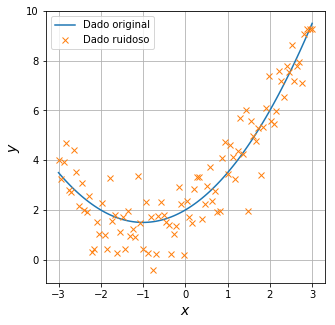

In [8]:
# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

In [9]:
# Polynomial order.
model_order = 2

# Concatenate both column vectors.
X = np.ones((M,1))
for i in range(1, model_order+1):
    X = np.c_[X, np.power(x, i)]
    
scaler = StandardScaler()
X = np.c_[np.ones((M,1)), scaler.fit_transform(X[:,1:])]

I = np.eye(model_order+1)
I[0,0] = 0

# Closed-form solution.
lambdaf = 0.0
a_opt = np.linalg.pinv(np.transpose(X).dot(X) + I.dot(lambdaf)).dot(np.transpose(X).dot(y_noisy))

# Calculate error.
yhat = X.dot(a_opt)
Joptimum = (1/M)*np.sum(np.power((y_noisy - yhat), 2) )

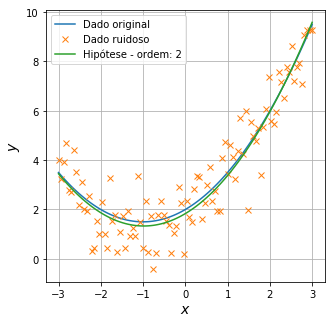

In [10]:
# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso') 
plt.plot(x, X.dot(a_opt), label='Hipótese - ordem: '+str(model_order))
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

In [158]:
# Sets the number of examples.
M = 100

# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

# Create target function and its noisy version.
x = np.linspace(-3, 3, M).reshape(M, 1)
y = 2 + x + 0.5*x**2;
y_noisy = y + np.random.randn(M, 1)

In [159]:
# Polynomial order.
model_order = 30

# Concatenate both column vectors.
X = np.ones((M,1))
for i in range(1, model_order+1):
    X = np.c_[X, np.power(x, i)]
    
scaler = StandardScaler()
X = np.c_[np.ones((M,1)), scaler.fit_transform(X[:,1:])]

In [249]:
# Batch gradient descent solution.

# learning rate.
alpha = 0.01
# Regularization term.
lambdaf = 0.0
# Maximum number of iterations.
n_iterations = 5000

# Random initialization of parameters.
a = np.zeros((model_order+1,1))
for i in range(0,model_order+1): a[i] = a_opt[i] + np.random.randn()
    
grad_hist = np.zeros((model_order+1, n_iterations))

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)
Jgd[0] = (1/M)*sum(np.power(y_noisy - X.dot(a), 2))

# Batch gradient-descent loop.
iteration = 0
error = 1
while iteration < n_iterations and error > 0.001:
#while iteration < n_iterations:
    a_aux = np.zeros((model_order+1, 1))
    for i in range(1, model_order+1): a_aux[i] = a[i]
    reg_term = a_aux*(2*lambdaf)
    gradients = -2/M*X.T.dot(y_noisy - X.dot(a)) + reg_term
    a = a - alpha * gradients
    Jgd[iteration+1] = (1/M)*sum(np.power((y_noisy - X.dot(a)), 2))
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    for i in range(0,model_order): grad_hist[i, iteration] = gradients[i]
    iteration = iteration + 1

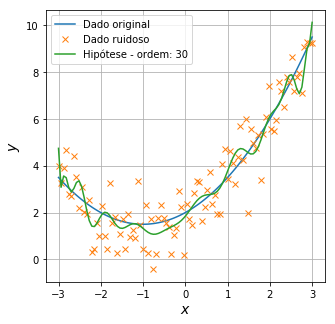

In [250]:
# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso') 
plt.plot(x, X.dot(a), label='Hipótese - ordem: '+str(model_order))
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

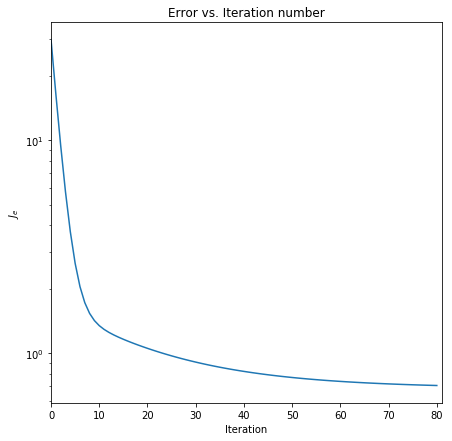

In [251]:
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

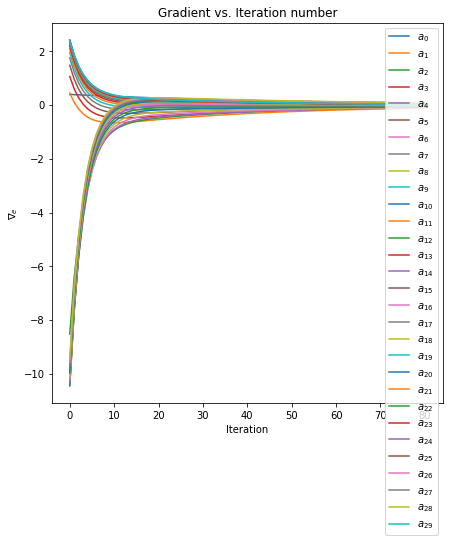

In [252]:
fig = plt.figure(figsize=(7,7))

for i in range(0, model_order):
    strr = '$a_{'+str(i)+'}$'
    plt.plot(np.arange(0, iteration), grad_hist[i,0:iteration], label=strr)
plt.xlabel('Iteration')
plt.ylabel('$\\nabla_e$')
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.show()

In [230]:
# Calculate mean squared error of optimum solution.
print('Erro ótimo: ', Joptimum)

for i in range(0, model_order+1):
    print('a%d:\t%1.4e' % (i,a_opt[i, 0]))

Erro ótimo:  0.6566933719848124
a0:	3.4265e+00
a1:	3.7503e+00
a2:	7.0700e+00
a3:	-4.0254e+01
a4:	-2.9749e+02
a5:	3.9944e+02
a6:	4.8888e+03
a7:	-1.7652e+03
a8:	-3.6962e+04
a9:	2.9427e+03
a10:	1.4925e+05
a11:	1.9988e+03
a12:	-3.3157e+05
a13:	-1.2570e+04
a14:	3.5636e+05
a15:	1.0335e+04
a16:	-2.6197e+04
a17:	7.0761e+03
a18:	-2.8350e+05
a19:	-5.9974e+03
a20:	7.9608e+04
a21:	-1.4230e+04
a22:	2.3851e+05
a23:	1.0507e+04
a24:	-7.1857e+04
a25:	1.1888e+04
a26:	-2.3368e+05
a27:	-1.4925e+04
a28:	2.0764e+05
a29:	4.3792e+03
a30:	-5.2206e+04


In [231]:
yhat = X.dot(a)
J = (1/M)*np.sum(np.power((y_noisy - yhat), 2) )
print('Erro: ', J)

for i in range(0, model_order):
    print('a%d:\t%1.4e' % (i,a[i, 0]))

Erro:  0.7837540679612819
a0:	3.4261e+00
a1:	2.5212e+00
a2:	4.7095e+00
a3:	-2.6377e+01
a4:	-1.9439e+02
a5:	2.6255e+02
a6:	3.2035e+03
a7:	-1.1569e+03
a8:	-2.4225e+04
a9:	1.9288e+03
a10:	9.7814e+04
a11:	1.3094e+03
a12:	-2.1730e+05
a13:	-8.2385e+03
a14:	2.3355e+05
a15:	6.7735e+03
a16:	-1.7170e+04
a17:	4.6372e+03
a18:	-1.8580e+05
a19:	-3.9293e+03
a20:	5.2174e+04
a21:	-9.3267e+03
a22:	1.5632e+05
a23:	6.8861e+03
a24:	-4.7093e+04
a25:	7.7913e+03
a26:	-1.5315e+05
a27:	-9.7821e+03
a28:	1.3608e+05
a29:	2.8699e+03
